<h1>H1-B Visa Approval Prediction

<h1>Name - Harman Jot Singh

<h1>Technocolabs Data-Scientist-Internship

<h1>Feature Engineering and Model Building

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel (r'/content/drive/MyDrive/col/H-1B_Disclosure_Data_FY2019/h_1b_vissanew.xlsx')

In [ ]:
df2 = df

In [ ]:
df2.head()

,Unnamed: 0,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,...,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS
0,0,WITHDRAWN,H-1B,"R/GA MEDIA GROUP, INC.",N,Y,ASSOCIATE CREATIVE DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,...,0,0.0,0,0,N,Y,N,179000.0,Year,1.0
1,1,WITHDRAWN,E-3 Australian,MOTHER INDUSTRIES LLC,N,Y,ACCOUNT SUPERVISOR (MOTHER),ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,...,0,0.0,0,0,N,Y,N,110000.0,Year,1.0
2,2,WITHDRAWN,E-3 Australian,"WE ARE UNLIMITED, INC.",N,Y,EXECUTIVE CREATIVE DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,...,1,0.0,0,0,N,Y,N,275000.0,Year,1.0
3,3,WITHDRAWN,E-3 Australian,"HELLO ELEPHANT, LLC",N,Y,PROJECT MANAGEMENT LEAD,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,...,1,0.0,0,0,N,Y,N,140000.0,Year,1.0
4,4,WITHDRAWN,E-3 Australian,"HELLO ELEPHANT, LLC",N,Y,"CREATIVE DIRECTOR, UX",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,...,1,0.0,0,0,N,Y,N,180000.0,Year,1.0


In [ ]:
df2 = df2.drop('Unnamed: 0', axis=1)

In [ ]:
print(df2.shape)

(664616, 20)


column datatypes

In [ ]:
catvars = df2.select_dtypes(include=['object']).columns
numvars = df2.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index(['CASE_STATUS', 'VISA_CLASS', 'EMPLOYER_NAME', 'SECONDARY_ENTITY_1',
        'AGENT_REPRESENTING_EMPLOYER', 'JOB_TITLE', 'SOC_TITLE', 'SOC_CODE',
        'CONTINUED_EMPLOYMENT', 'H-1B_DEPENDENT', 'SUPPORT_H1B',
        'WILLFUL_VIOLATOR', 'WAGE_UNIT_OF_PAY_1'],
       dtype='object'),
 Index(['NAICS_CODE', 'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
        'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'WAGE_RATE_OF_PAY_FROM_1',
        'TOTAL_WORKER_POSITIONS'],
       dtype='object'))

Display Unique values in each Columns

In [ ]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df2[col].unique()}')
    
def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df2[col].value_counts()}')

    
for col in df2.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col CASE_STATUS is : ['WITHDRAWN' 'CERTIFIED-WITHDRAWN' 'CERTIFIED' 'DENIED']
---------------------------------------------------------------------------
Details of the particular col VISA_CLASS is : ['H-1B' 'E-3 Australian' 'H-1B1 Singapore' 'H-1B1 Chile']
---------------------------------------------------------------------------
Details of the particular col EMPLOYER_NAME is : ['R/GA MEDIA GROUP, INC.' 'MOTHER INDUSTRIES LLC' 'WE ARE UNLIMITED, INC.'
 ... 'EVEREST CONSULTANTS, INC.' 'EMBRAER EXECUTIVE AIRCRAFT, INC.'
 'PORT LOGISTICS TERMINAL OPERATIONS, LLC']
---------------------------------------------------------------------------
Details of the particular col SECONDARY_ENTITY_1 is : ['N' 'Y']
---------------------------------------------------------------------------
Details of the particular col AGENT_REPRESENTING_EMPLOYER is : ['Y' 'N']
---------------------------------------------------------------------------
Details of the particular col JOB_TITLE

On **VISA CLASS** we only want **H1-B Visa** so we drop other visa class

In [ ]:
df2 = df2.drop(df2.index[df2['VISA_CLASS'].isin(["H-1B1 Chile","E-3 Australian","H-1B1 Singapore"])])

replace CERTIFIED-WITHDRAWN with CERTIFIED and WITHDRAWN with DENIED

In [ ]:
df2['CASE_STATUS'] = df2['CASE_STATUS'].replace({'CERTIFIED-WITHDRAWN':'CERTIFIED', 'WITHDRAWN':'DENIED'})
df2['CASE_STATUS'].value_counts()

CERTIFIED    624690
DENIED        24393
Name: CASE_STATUS, dtype: int64

<h2> Feature Engineering

Check corelation

In [ ]:
df2.corr()

,NAICS_CODE,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,WAGE_RATE_OF_PAY_FROM_1,TOTAL_WORKER_POSITIONS
NAICS_CODE,1.000000,-0.030240,-0.038001,-0.095612,-0.115130,-0.013102,-0.103594
CHANGE_PREVIOUS_EMPLOYMENT,-0.030240,1.000000,0.298329,0.410118,0.513815,0.019494,0.502481
NEW_CONCURRENT_EMPLOYMENT,-0.038001,0.298329,1.000000,0.235493,0.293540,-0.040182,0.375202
CHANGE_EMPLOYER,-0.095612,0.410118,0.235493,1.000000,0.520204,0.071655,0.570483
AMENDED_PETITION,-0.115130,0.513815,0.293540,0.520204,1.000000,0.020817,0.597583
WAGE_RATE_OF_PAY_FROM_1,-0.013102,0.019494,-0.040182,0.071655,0.020817,1.000000,0.011393
TOTAL_WORKER_POSITIONS,-0.103594,0.502481,0.375202,0.570483,0.597583,0.011393,1.000000


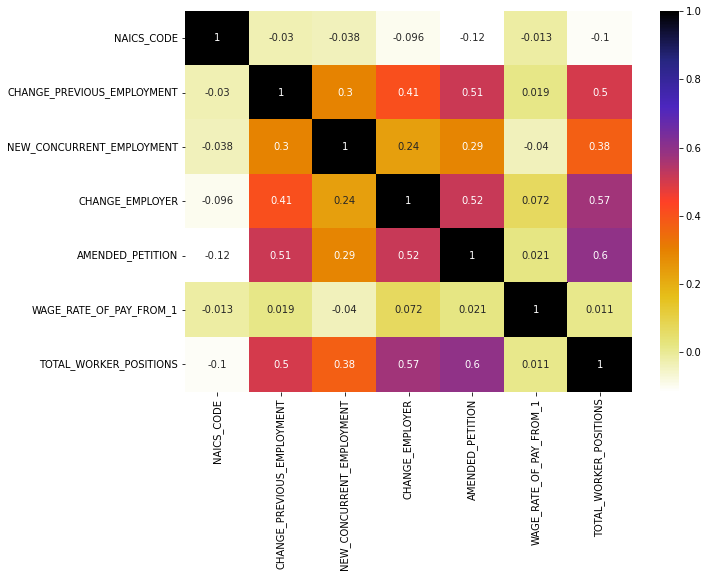

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(df2, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df2.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df2, 0.7)
len(set(corr_features))

0

Handling Null Values

In [ ]:
null_value = df2.isnull().sum().sort_values(ascending=False)
null_value_per = df2.isnull().mean().sort_values(ascending=False)*100

In [ ]:
null_value_df = pd.DataFrame({
    "Features" : null_value.index,
    "No.of Missing_Value" :null_value.values,
    "Percentages of Missing_Value" : null_value_per.values
})
null_value_df

,Features,No.of Missing_Value,Percentages of Missing_Value
0,EMPLOYER_NAME,10,0.001541
1,WAGE_UNIT_OF_PAY_1,7,0.001078
2,WAGE_RATE_OF_PAY_FROM_1,7,0.001078
3,SOC_TITLE,4,0.000616
4,SOC_CODE,4,0.000616
5,TOTAL_WORKER_POSITIONS,2,0.000308
6,NAICS_CODE,2,0.000308
7,JOB_TITLE,1,0.000154
8,NEW_CONCURRENT_EMPLOYMENT,1,0.000154
9,AMENDED_PETITION,0,0.000000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649083 entries, 0 to 664615
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CASE_STATUS                  649083 non-null  object 
 1   VISA_CLASS                   649083 non-null  object 
 2   EMPLOYER_NAME                649073 non-null  object 
 3   SECONDARY_ENTITY_1           649083 non-null  object 
 4   AGENT_REPRESENTING_EMPLOYER  649083 non-null  object 
 5   JOB_TITLE                    649082 non-null  object 
 6   SOC_TITLE                    649079 non-null  object 
 7   SOC_CODE                     649079 non-null  object 
 8   NAICS_CODE                   649081 non-null  float64
 9   CONTINUED_EMPLOYMENT         649083 non-null  object 
 10  CHANGE_PREVIOUS_EMPLOYMENT   649083 non-null  int64  
 11  NEW_CONCURRENT_EMPLOYMENT    649082 non-null  float64
 12  CHANGE_EMPLOYER              649083 non-null  int64  
 13 

In [ ]:
df2 = df2.dropna()

In [ ]:
df2.apply(lambda x: sum(x.isnull()))

CASE_STATUS                    0
VISA_CLASS                     0
EMPLOYER_NAME                  0
SECONDARY_ENTITY_1             0
AGENT_REPRESENTING_EMPLOYER    0
JOB_TITLE                      0
SOC_TITLE                      0
SOC_CODE                       0
NAICS_CODE                     0
CONTINUED_EMPLOYMENT           0
CHANGE_PREVIOUS_EMPLOYMENT     0
NEW_CONCURRENT_EMPLOYMENT      0
CHANGE_EMPLOYER                0
AMENDED_PETITION               0
H-1B_DEPENDENT                 0
SUPPORT_H1B                    0
WILLFUL_VIOLATOR               0
WAGE_RATE_OF_PAY_FROM_1        0
WAGE_UNIT_OF_PAY_1             0
TOTAL_WORKER_POSITIONS         0
dtype: int64

In [ ]:
#unbalance Data
df2_down = df2

In [ ]:
df2_down.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS
0,DENIED,H-1B,"R/GA MEDIA GROUP, INC.",N,Y,ASSOCIATE CREATIVE DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,1,0,0.0,0,0,N,Y,N,179000.0,Year,1.0
5,DENIED,H-1B,"MCCANN-ERICKSON MARKETING, INC.",N,Y,GLOBAL BRAND SUPERVISOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,1,0,0.0,0,0,N,Y,N,84400.0,Year,1.0
6,DENIED,H-1B,MH SUB I LLC,N,Y,DIRECTOR OF BUSINESS DEVELOPMENT,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,454111.0,0,1,0.0,0,0,N,Y,N,100000.0,Year,1.0
7,DENIED,H-1B,"KIIP, INC.",N,Y,HEAD OF BUSINESS DEVELOPMENT,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541990.0,1,0,0.0,0,0,N,Y,N,131685.0,Year,1.0
8,DENIED,H-1B,"SUNSHINE SACHS & ASSOCIATES WEST, LLC",N,Y,"ACCOUNT DIRECTOR, SOCIAL MEDIA",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541820.0,1,0,0.0,0,0,N,Y,N,99750.0,Year,1.0


In [ ]:
print(df2_down.shape)

(649058, 20)


In [ ]:
catvars1 = df2_down.select_dtypes(include=['object']).columns
numvars1 = df2_down.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars1,numvars1

(Index(['CASE_STATUS', 'VISA_CLASS', 'EMPLOYER_NAME', 'SECONDARY_ENTITY_1',
        'AGENT_REPRESENTING_EMPLOYER', 'JOB_TITLE', 'SOC_TITLE', 'SOC_CODE',
        'CONTINUED_EMPLOYMENT', 'H-1B_DEPENDENT', 'SUPPORT_H1B',
        'WILLFUL_VIOLATOR', 'WAGE_UNIT_OF_PAY_1'],
       dtype='object'),
 Index(['NAICS_CODE', 'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
        'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'WAGE_RATE_OF_PAY_FROM_1',
        'TOTAL_WORKER_POSITIONS'],
       dtype='object'))

outliers

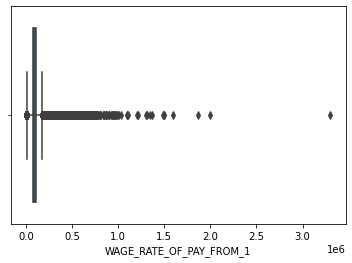

In [ ]:
sns.boxplot(df2_down['WAGE_RATE_OF_PAY_FROM_1'])

In [ ]:
q1 = df2_down["WAGE_RATE_OF_PAY_FROM_1"].quantile(0.25)
q3 = df2_down["WAGE_RATE_OF_PAY_FROM_1"].quantile(0.75)
IQR = q3 - q1
outliers = ((df2_down["WAGE_RATE_OF_PAY_FROM_1"] < (q1 - 1.5 * IQR)) | (df2_down["WAGE_RATE_OF_PAY_FROM_1"] > (q3 + 1.5 * IQR))).sum()
print('No of outliers: ', outliers)

No of outliers:  68432


In [ ]:
df2_down = df2_down.drop(df2_down[df2_down.WAGE_RATE_OF_PAY_FROM_1 < (q1 - 1.5 * IQR)].index)
df2_down = df2_down.drop(df2_down[df2_down.WAGE_RATE_OF_PAY_FROM_1 > (q1 + 1.5 * IQR)].index)

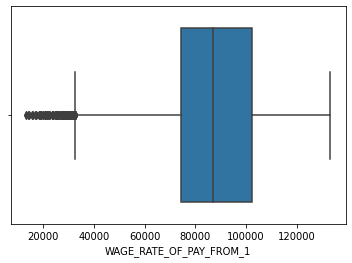

In [ ]:
sns.boxplot(df2_down['WAGE_RATE_OF_PAY_FROM_1'])

In [ ]:
print(df2_down.shape)

(519243, 20)


In [ ]:
df2_down.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS
5,DENIED,H-1B,"MCCANN-ERICKSON MARKETING, INC.",N,Y,GLOBAL BRAND SUPERVISOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,1,0,0.0,0,0,N,Y,N,84400.0,Year,1.0
6,DENIED,H-1B,MH SUB I LLC,N,Y,DIRECTOR OF BUSINESS DEVELOPMENT,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,454111.0,0,1,0.0,0,0,N,Y,N,100000.0,Year,1.0
7,DENIED,H-1B,"KIIP, INC.",N,Y,HEAD OF BUSINESS DEVELOPMENT,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541990.0,1,0,0.0,0,0,N,Y,N,131685.0,Year,1.0
8,DENIED,H-1B,"SUNSHINE SACHS & ASSOCIATES WEST, LLC",N,Y,"ACCOUNT DIRECTOR, SOCIAL MEDIA",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541820.0,1,0,0.0,0,0,N,Y,N,99750.0,Year,1.0
9,DENIED,H-1B,"SOLAREDGE TECHNOLOGIES, INC.",N,Y,PRODUCT MARKETING MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,334413.0,0,0,0.0,0,0,N,Y,N,130000.0,Year,1.0


<h3> Find Duplicates and Treat it

In [ ]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df2_down[col].unique()}')
    
def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df2_down[col].value_counts()}')

    
for col in df2_down.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col CASE_STATUS is : ['DENIED' 'CERTIFIED']
---------------------------------------------------------------------------
Details of the particular col VISA_CLASS is : ['H-1B']
---------------------------------------------------------------------------
Details of the particular col EMPLOYER_NAME is : ['MCCANN-ERICKSON MARKETING, INC.' 'MH SUB I LLC' 'KIIP, INC.' ...
 'SABINE SURVEYORS LTD.' 'EVEREST CONSULTANTS, INC.'
 'EMBRAER EXECUTIVE AIRCRAFT, INC.']
---------------------------------------------------------------------------
Details of the particular col SECONDARY_ENTITY_1 is : ['N' 'Y']
---------------------------------------------------------------------------
Details of the particular col AGENT_REPRESENTING_EMPLOYER is : ['Y' 'N']
---------------------------------------------------------------------------
Details of the particular col JOB_TITLE is : ['GLOBAL BRAND SUPERVISOR' 'DIRECTOR OF BUSINESS DEVELOPMENT'
 'HEAD OF BUSINESS DEVELOPMENT' ... 'INSPECTO

In [ ]:
df2_down['CONTINUED_EMPLOYMENT'].unique()

array([1, '0', 0, '1', 2, 5, 3, 4, '2', 10, '3', '5', '001', '4', 6, '01',
       '10', 25, 15, '15', 20, '6', 8, 'B', 99, '8', '00', 12, 13, 50, 30,
       '25', '40', '12', 7, 40, 18, 17, '20', '30', 35, '50', 21, '18'],
      dtype=object)

In [ ]:
df2_down['CONTINUED_EMPLOYMENT'] = df2_down['CONTINUED_EMPLOYMENT'].replace({ '0': 0,'1': 1,'2': 2,'3': 3,'4': 4,'5': 5,'6': 6,'01': 1,'15': 15})

In [ ]:
df2_down = df2_down.drop(df2_down.index[df2_down['CONTINUED_EMPLOYMENT'].isin(['B'])])

In [ ]:
df2_down['CONTINUED_EMPLOYMENT'].value_counts()

0      394661
1      116077
5        4316
2        1481
4         988
3         559
10        391
10        347
25         82
15         61
8          56
6          55
20         46
12         24
8          18
50         14
30         14
12          9
18          7
40          6
001         5
30          4
25          3
35          3
7           2
40          2
20          2
21          1
50          1
99          1
17          1
13          1
00          1
18          1
Name: CONTINUED_EMPLOYMENT, dtype: int64

In [ ]:
df2_down['NEW_CONCURRENT_EMPLOYMENT'].value_counts()

0.0     516878
1.0       1789
5.0        243
4.0        191
2.0        127
10.0         6
3.0          5
99.0         1
Name: NEW_CONCURRENT_EMPLOYMENT, dtype: int64

In [ ]:
df2_down['TOTAL_WORKER_POSITIONS'].value_counts()

1.0      487590
3.0        6228
15.0       4689
2.0        4676
10.0       3785
5.0        3636
6.0        1662
20.0       1496
25.0       1299
4.0        1032
50.0        978
30.0        863
24.0        202
8.0         176
12.0        174
7.0         139
100.0       101
75.0         92
40.0         81
9.0          48
45.0         30
11.0         25
16.0         23
14.0         23
13.0         18
150.0        17
17.0         15
34.0         15
32.0         14
35.0         13
18.0         13
60.0         12
36.0         11
200.0         9
22.0          8
19.0          8
23.0          6
99.0          6
175.0         6
28.0          5
80.0          3
90.0          2
54.0          1
37.0          1
78.0          1
70.0          1
594.0         1
43.0          1
31.0          1
47.0          1
21.0          1
26.0          1
76.0          1
Name: TOTAL_WORKER_POSITIONS, dtype: int64

In [ ]:
df2_down['WAGE_RATE_OF_PAY_FROM_1'].value_counts()

100000.00    9614
90000.00     9550
110000.00    9010
120000.00    8688
85000.00     8343
             ... 
128284.52       1
72892.00        1
104305.97       1
92045.00        1
76377.60        1
Name: WAGE_RATE_OF_PAY_FROM_1, Length: 41009, dtype: int64

In [ ]:
df2_down['NEW_CONCURRENT_EMPLOYMENT'].value_counts()

0.0     516878
1.0       1789
5.0        243
4.0        191
2.0        127
10.0         6
3.0          5
99.0         1
Name: NEW_CONCURRENT_EMPLOYMENT, dtype: int64

In [ ]:
df2_down['NAICS_CODE'].value_counts()

541511.0    181983
541512.0     55043
611310.0     23634
5416.0       16992
54151.0      14194
             ...  
51741.0          1
541715.0         1
238300.0         1
212222.0         1
44811.0          1
Name: NAICS_CODE, Length: 1872, dtype: int64

In [ ]:
# converting float to int
df2_down = df2_down.astype({"TOTAL_WORKER_POSITIONS":'int', "NEW_CONCURRENT_EMPLOYMENT":'int', "WAGE_RATE_OF_PAY_FROM_1":'int', "NAICS_CODE":'int'}) 

In [ ]:
df2_down.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519240 entries, 5 to 664611
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   CASE_STATUS                  519240 non-null  object
 1   VISA_CLASS                   519240 non-null  object
 2   EMPLOYER_NAME                519240 non-null  object
 3   SECONDARY_ENTITY_1           519240 non-null  object
 4   AGENT_REPRESENTING_EMPLOYER  519240 non-null  object
 5   JOB_TITLE                    519240 non-null  object
 6   SOC_TITLE                    519240 non-null  object
 7   SOC_CODE                     519240 non-null  object
 8   NAICS_CODE                   519240 non-null  int64 
 9   CONTINUED_EMPLOYMENT         519240 non-null  object
 10  CHANGE_PREVIOUS_EMPLOYMENT   519240 non-null  int64 
 11  NEW_CONCURRENT_EMPLOYMENT    519240 non-null  int64 
 12  CHANGE_EMPLOYER              519240 non-null  int64 
 13  AMENDED_PETITI

In [ ]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df2_down[col].unique()}')
    
def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df2_down[col].value_counts()}')

    
for col in df2_down.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col CASE_STATUS is : ['DENIED' 'CERTIFIED']
---------------------------------------------------------------------------
Details of the particular col VISA_CLASS is : ['H-1B']
---------------------------------------------------------------------------
Details of the particular col EMPLOYER_NAME is : ['MCCANN-ERICKSON MARKETING, INC.' 'MH SUB I LLC' 'KIIP, INC.' ...
 'SABINE SURVEYORS LTD.' 'EVEREST CONSULTANTS, INC.'
 'EMBRAER EXECUTIVE AIRCRAFT, INC.']
---------------------------------------------------------------------------
Details of the particular col SECONDARY_ENTITY_1 is : ['N' 'Y']
---------------------------------------------------------------------------
Details of the particular col AGENT_REPRESENTING_EMPLOYER is : ['Y' 'N']
---------------------------------------------------------------------------
Details of the particular col JOB_TITLE is : ['GLOBAL BRAND SUPERVISOR' 'DIRECTOR OF BUSINESS DEVELOPMENT'
 'HEAD OF BUSINESS DEVELOPMENT' ... 'INSPECTO

<h3>Replace some catagorical to numeric 

In [ ]:
#CASE_STATUS is : ['CERTIFIED' 'DENIED']
#VISA_CLASS is : ['H-1B']
#SECONDARY_ENTITY_1 is : ['Y' 'N']
#AGENT_REPRESENTING_EMPLOYER is : ['N' 'Y']
#H-1B_DEPENDENT is : ['Y' 'N']
#SUPPORT_H1B is : ['Y' 'N']
#WILLFUL_VIOLATOR is : ['N' 'Y']
#WAGE_UNIT_OF_PAY_1 is : ['Year' 'Hour' 'Month' 'Bi-Weekly' 'Week']

In [ ]:
df2_down['CASE_STATUS'] = df2_down['CASE_STATUS'].replace({ 'DENIED': 0,'CERTIFIED': 1})
df2_down['VISA_CLASS'] = df2_down['VISA_CLASS'].replace({ 'H-1B': 1})
df2_down['SECONDARY_ENTITY_1'] = df2_down['SECONDARY_ENTITY_1'].replace({ 'N': 0,'Y': 1})
df2_down['AGENT_REPRESENTING_EMPLOYER'] = df2_down['AGENT_REPRESENTING_EMPLOYER'].replace({ 'N': 0,'Y': 1})
df2_down['H-1B_DEPENDENT'] = df2_down['H-1B_DEPENDENT'].replace({ 'N': 0,'Y': 1})
df2_down['SUPPORT_H1B'] = df2_down['SUPPORT_H1B'].replace({ 'N': 0,'Y': 1})
df2_down['WILLFUL_VIOLATOR'] = df2_down['WILLFUL_VIOLATOR'].replace({ 'N': 0,'Y': 1})
df2_down['WAGE_UNIT_OF_PAY_1'] = df2_down['WAGE_UNIT_OF_PAY_1'].replace({ 'Year': 0,'Hour': 1,'Month': 2,'Bi-Weekly': 3,'Week': 4})

In [ ]:
df2_down2 = df2_down

In [ ]:
df2_down2.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS
5,0,1,"MCCANN-ERICKSON MARKETING, INC.",0,1,GLOBAL BRAND SUPERVISOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810,1,0,0,0,0,0,1,0,84400,0,1
6,0,1,MH SUB I LLC,0,1,DIRECTOR OF BUSINESS DEVELOPMENT,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,454111,0,1,0,0,0,0,1,0,100000,0,1
7,0,1,"KIIP, INC.",0,1,HEAD OF BUSINESS DEVELOPMENT,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541990,1,0,0,0,0,0,1,0,131685,0,1
8,0,1,"SUNSHINE SACHS & ASSOCIATES WEST, LLC",0,1,"ACCOUNT DIRECTOR, SOCIAL MEDIA",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541820,1,0,0,0,0,0,1,0,99750,0,1
9,0,1,"SOLAREDGE TECHNOLOGIES, INC.",0,1,PRODUCT MARKETING MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,334413,0,0,0,0,0,0,1,0,130000,0,1


<h4>There are also many unique values in *SOC_TiTLE* column. I have created a dictionary to find out the data that are belonged to specific occupation section. I have created 13 categories for this purpose. Then put the values in **Other** category that have application number less than 5.

In [ ]:
#remove special characters to uniform format
df2_down2['SOC_TITLE']=df2_down2['SOC_TITLE'].str.lower()
soc = {
   'SOC_NAME': {
      r"[*.\-,);\"'(+/]|<font>|</font>|(^[0-9]$)":'', r'&amp|&':' and ',
      r'^compute|^computer|^copmuter|^computers|^comuter|^compuer':'computer',
      r'induatrial':'industrial',
      r'engineers|enginers|engineering|engineerarquitects|enigneers|engineerarchitect':'engineer',
      r'analysta|analystt|analyhsts|analys$|anlysts':'analyst',
      r'sofware|softare|softwware':'software',
      r'^all other|all other$|other$|all othter$':'',
      r'systemanalyst':'system analyst',
      r'hardward':'hardware',
      r'aplications|applications|appllications|applicationsssss':'application',
      r'dvelopers|developers|developpers': 'developer',
      r'datebase':'database',
      r'maanger|mangers|managerse|managers':'manager', 
      r'sysems|systems':'system', 
      r'technicans|technicians':'technician',
      r'deisgners|designers':'designer',
      r'operations':'operation', 
      r'except computer non|except computer|except compuer':'', 
      r'software application developer|application developer':'software developer application'}                    
}

df2_down2.replace(soc, regex=True, inplace=True)
df2_down2=df2_down2[~df2_down2['SOC_TITLE'].str.contains('^[0-9]*$',na=False)]

In [ ]:
job_sector = {
   'SOC_TITLE': {
      r".*agricultural(?s).*|.*maids(?s).*|.*cleaner(?s).*|.*bakers(?s).*|.*bartenders(?s).*|.*chefs(?s).*|.*butchers(?s).*|.*meat(?s).*|dishwashers|^laundry(?s).*|^funeral(?s).*|.*janitor(?s).*|^housekeeping(?s).*|^farmworkers and laborers, crop, nursery, and greenhouse(?s).*|^cook(?s).*|.*food(?s).*":'Food & Service',
      r'^computer(?s).*|^information security(?s).*|^web developer(?s).*|^database(?s).*|^data warehousing(?s).*|^graphic(?s).*|^network and computer(?s).*|.*network system(?s).*|^software(?s).*|^analyst(?s).*|^information technology(?s).*':'IT Profession',
      r".*mathematician(?s).*|.*statisticians(?s).*|statistican|biostatisticians":'Mathematician',  
      r'.*survey(?s).*|.*school(?s).*|.*secondary school(?s).*|.*elementary school(?s).*|.*teachers(?s).*|.*postsecondary(?s).*|.*educators(?s).*|.*research assistants(?s).*|.*education(?s).*|.*translators(?s).*|.*training(?s).*|.*instructors(?s).*|.*librarians(?s).*|.*instructional coordinators(?s).*':'Teaching & Education',
      r'.*physician assistants(?s).*|.*orthodontists(?s).*|.*optometrists(?s).*|.*epidemiologists(?s).*|.*anesthesiologists(?s).*|.*rehabilitation(?s).*|.*dietitians(?s).*|.*nutritionists(?s).*|.*gynecologists(?s).*|.*mental(?s).*|.*health(?s).*|^biochemists(?s).*|^healthcare(?s).*|^health diagnosing(?s).*|.*pediatricians(?s).*|.*surgeons(?s).*|.*physical(?s).*|physicists|.*medical(?s).*|.*nurses(?s).*|.*pathologists(?s).*|.*practitioners$|.*psychiatrists(?s).*|veterinarians|pharmacists|^radiologists(?s).*|.*exercise physiologists(?s).*|.*therapists(?s).*|.*psychologists, all other(?s).*|neurologists|.*dentists(?s).*':'Medical', 
      r'.*loan(?s).*|.*property(?s).*|.*credit analysts(?s).*|.*financial(?s).*|^budget(?s).*|.*bill(?s).*|.*account(?s).*|.*accountants(?s).*|economists|^cost(?s).*|^statistical assistants(?s).*|^business operation specialists(?s).*|.*fiancial(?s).*':'Finance',
      r'.*aircraft(?s).*|.*operating engineer(?s).*|.*structural(?s).*|.*engineer(?s).*|.*electrical(?s).*|.*electronics(?s).*|.*designer(?s).*|.*construction laborers(?s).*|.*architect(?s).*':'Architecture & Engineering',   
      r'.*biologist(?s).*|.*astronomers(?s).*|.*microbiologists(?s).*|.*biophysicist(?s).*|.*scienctists(?s).*|.*scientists(?s).*|chemists|^biological scientists $|^biomedical(?s).*':'Advance Science',
      r'.*manager(?s).*|operations research analysts|.*management(?s).*|chief executives|public relations specialists|logisticians|administrative services manager|.*planners(?s).*|human resources specialists|lodging manager|engineer manager':'Management',
      r'.*market(?s).*|.*marketing(?s).*|.*wholesale(?s).*|^sales(?s).*|^advertising(?s).*|compliance officers|.*salespersons$':'Marketing',
      r'.*judicial(?s).*|.*police(?s).*|.*law(?s).*|lawyers|.*judges(?s).*|.*clergy(?s).*|.*attorney(?s).*|.*clergy(?s).*|.*counselors, all other(?s).*|.*paralegals(?s).*|.*legal(?s).*':'Government Service',
      r'.*technician(?s).*|.*operators(?s).*|.*technologists(?s).*':'Technician',
      r'.*drivers(?s).*|.*logistics(?s).*|.*cargo and freight agents(?s).*':'Logistics',
      r'.*audio(?s).*|.*photo(?s).*|.*recreation(?s).*|.*artists(?s).*|.*auditors(?s).*|.*athletic(?s).*|.*video(?s).*|.*writers(?s).*|.*music(?s).*|.*models(?s).*|composers|.*media(?s).*|singers|.*dancers(?s).*|poets and lyricists|coaches and scouts|.*sport(?s).*|.*fashion(?s).*|^media and communication workers$|^multimedia artists and animators|editors|^set designer$|^producers and directors$|^art directors$|^designer$|^reporters and correspondents$|.*entertainment(?s).*':'Fashion & Entertainment',
   } 
}
df2_down2.replace(job_sector, regex=True, inplace=True)

In [ ]:
cdf_dict=df2_down2['SOC_TITLE'].value_counts().to_dict()
soc_list = [k for k,v in cdf_dict.items() if v<=10]
len(soc_list)
df2_down2.SOC_TITLE = np.where(df2_down2['SOC_TITLE'].isin(soc_list), 'Others', df2_down2.SOC_TITLE)

In [ ]:
df2_down2['SOC_TITLE'].value_counts()

IT Profession                                           366395
Architecture & Engineering                               45153
Management                                               25567
Finance                                                  21510
Medical                                                  17650
Teaching & Education                                     13384
Advance Science                                           8722
Mathematician                                             8260
Marketing                                                 5879
Fashion & Entertainment                                   1794
Technician                                                 979
Food & Service                                             863
Government Service                                         825
actuaries                                                  539
business operations specialists, all other                 405
Others                                                 

In [ ]:
df2_down2.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS
5,0,1,"MCCANN-ERICKSON MARKETING, INC.",0,1,GLOBAL BRAND SUPERVISOR,Management,11-2011,541810,1,0,0,0,0,0,1,0,84400,0,1
6,0,1,MH SUB I LLC,0,1,DIRECTOR OF BUSINESS DEVELOPMENT,Management,11-2011,454111,0,1,0,0,0,0,1,0,100000,0,1
7,0,1,"KIIP, INC.",0,1,HEAD OF BUSINESS DEVELOPMENT,Management,11-2011,541990,1,0,0,0,0,0,1,0,131685,0,1
8,0,1,"SUNSHINE SACHS & ASSOCIATES WEST, LLC",0,1,"ACCOUNT DIRECTOR, SOCIAL MEDIA",Management,11-2011,541820,1,0,0,0,0,0,1,0,99750,0,1
9,0,1,"SOLAREDGE TECHNOLOGIES, INC.",0,1,PRODUCT MARKETING MANAGER,Management,11-2011,334413,0,0,0,0,0,0,1,0,130000,0,1


In [ ]:
#df2_down2.to_excel("/content/drive/MyDrive/col/H-1B_Disclosure_Data_FY2019/h_1b_vissanewFeatureengg.xlsx")

drop unwanted columns

In [ ]:
df_final = df2_down2.drop(['EMPLOYER_NAME','JOB_TITLE','SOC_CODE', 'NAICS_CODE'], axis = 1)


In [ ]:
df_final.head()

,CASE_STATUS,VISA_CLASS,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,SOC_TITLE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS
5,0,1,0,1,Management,1,0,0,0,0,0,1,0,84400,0,1
6,0,1,0,1,Management,0,1,0,0,0,0,1,0,100000,0,1
7,0,1,0,1,Management,1,0,0,0,0,0,1,0,131685,0,1
8,0,1,0,1,Management,1,0,0,0,0,0,1,0,99750,0,1
9,0,1,0,1,Management,0,0,0,0,0,0,1,0,130000,0,1


<h4>Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le=LabelEncoder()
df_final.columns

Index(['CASE_STATUS', 'VISA_CLASS', 'SECONDARY_ENTITY_1',
       'AGENT_REPRESENTING_EMPLOYER', 'SOC_TITLE', 'CONTINUED_EMPLOYMENT',
       'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
       'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'H-1B_DEPENDENT', 'SUPPORT_H1B',
       'WILLFUL_VIOLATOR', 'WAGE_RATE_OF_PAY_FROM_1', 'WAGE_UNIT_OF_PAY_1',
       'TOTAL_WORKER_POSITIONS'],
      dtype='object')

In [ ]:
cat_var=["SOC_TITLE"]
for i in cat_var:
   df_final[i]=le.fit_transform(df_final[i])


In [ ]:
df_final.head()

,CASE_STATUS,VISA_CLASS,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,SOC_TITLE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS
5,0,1,0,1,8,1,0,0,0,0,0,1,0,84400,0,1
6,0,1,0,1,8,0,1,0,0,0,0,1,0,100000,0,1
7,0,1,0,1,8,1,0,0,0,0,0,1,0,131685,0,1
8,0,1,0,1,8,1,0,0,0,0,0,1,0,99750,0,1
9,0,1,0,1,8,0,0,0,0,0,0,1,0,130000,0,1


In [ ]:
#df_final.to_excel("/content/drive/MyDrive/col/H-1B_Disclosure_Data_FY2019/h_1b_vissanewFeatureenggandencoding.xlsx")

<h2>Feature Selection

Corelation

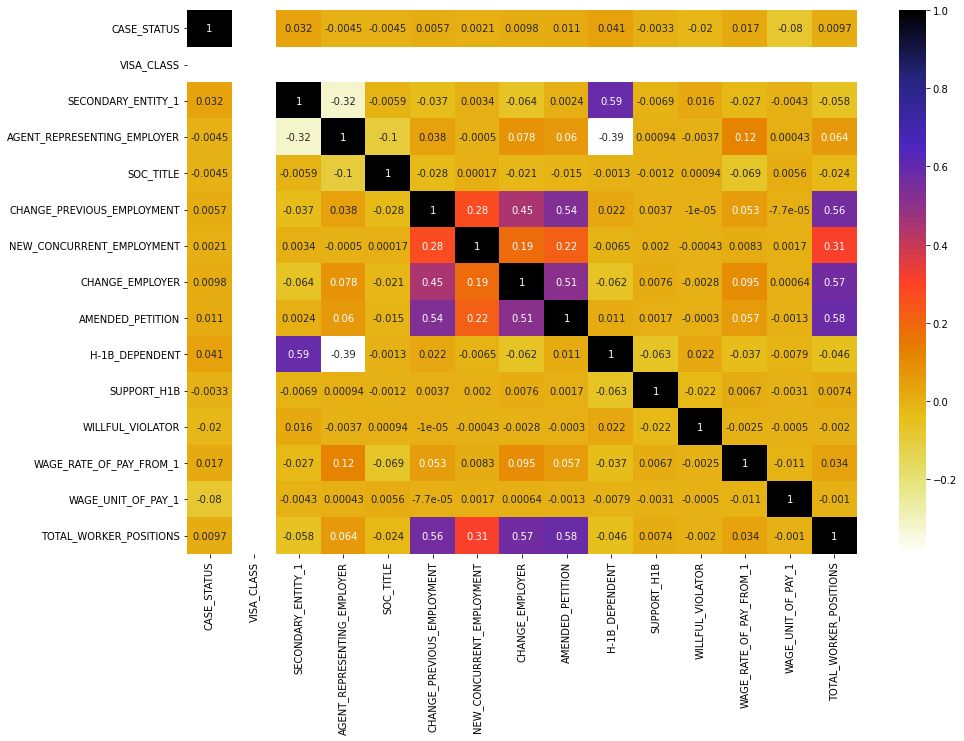

In [ ]:
plt.figure(figsize=(15,10))
cor = df_final.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
logidf = df_final[['CASE_STATUS','SECONDARY_ENTITY_1','AGENT_REPRESENTING_EMPLOYER','CONTINUED_EMPLOYMENT','CHANGE_PREVIOUS_EMPLOYMENT','NEW_CONCURRENT_EMPLOYMENT','CHANGE_EMPLOYER','AMENDED_PETITION','H-1B_DEPENDENT','SUPPORT_H1B','WILLFUL_VIOLATOR','TOTAL_WORKER_POSITIONS']]

In [ ]:
logidf.rename(columns = {'H-1B_DEPENDENT':'H1B_DEPENDENT'}, inplace = True)

In [ ]:
logidf.head()

,CASE_STATUS,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,TOTAL_WORKER_POSITIONS
5,0,0,1,1,0,0,0,0,0,1,0,1
6,0,0,1,0,1,0,0,0,0,1,0,1
7,0,0,1,1,0,0,0,0,0,1,0,1
8,0,0,1,1,0,0,0,0,0,1,0,1
9,0,0,1,0,0,0,0,0,0,1,0,1


In [ ]:
X = logidf.drop(['CASE_STATUS'], axis=1)
y = logidf.CASE_STATUS

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.2)

Extra Tree Classifier for Feature Selection

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
extra_tree_forest.fit(X, y)

feature_importance = extra_tree_forest.feature_importances_
  
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

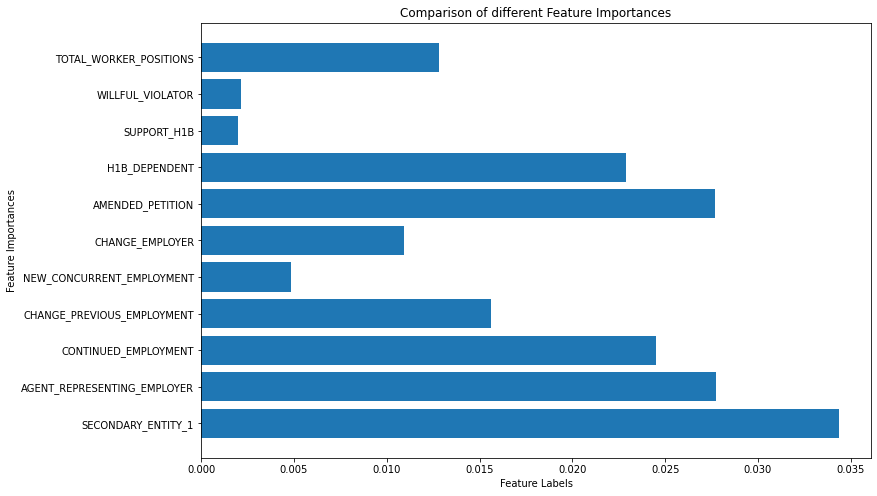

In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

<h3>Model Building

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
def roc_curve_graph(x_test,y_test,model):
    preds = model. predict_proba(x_test) [:,1]

In [ ]:
def metrics_cal(x_test,y_test,prediction,model):    
    print("Model Accuracy:",metrics.accuracy_score(y_test, prediction))
    probs = model.predict_proba(x_test)
    roc_auc = metrics.roc_auc_score(y_test, probs[:,1]) 
    print("ROC:",roc_auc)
    print("Confusion Matrix:",metrics.confusion_matrix(y_test, prediction)) 
    print("Classification Report:", metrics.classification_report(y_test, prediction))  
    print("precision:",metrics.precision_score(y_test, prediction, pos_label=1))  
    print("Recall:",metrics.recall_score(y_test, prediction, pos_label=1))  
    print("F1 Score:",metrics.f1_score(y_test, prediction, pos_label=1))

In [ ]:
from sklearn import metrics

def train_test_acc(model,x_train,y_train,x_test,y_test):
    print('Accuracy on training set: {:.2f}'
     .format(model.score(x_train, y_train)))
    print('Accuracy on test set: {:.2f}'
     .format(model.score(x_test, y_test)))

<h3>LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [ ]:
prediction=logit.predict(x_test)

train_test_acc(logit,x_train,y_train,x_test,y_test)

metrics_cal(x_test,y_test,prediction,logit)

roc_curve_graph(x_test,y_test,logit)

Accuracy on training set: 0.96
Accuracy on test set: 0.96
Model Accuracy: 0.9622910407518681
ROC: 0.5770951021464769
Confusion Matrix: [[    0  3916]
 [    0 99932]]
Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3916
           1       0.96      1.00      0.98     99932

    accuracy                           0.96    103848
   macro avg       0.48      0.50      0.49    103848
weighted avg       0.93      0.96      0.94    103848

precision: 0.9622910407518681
Recall: 1.0
F1 Score: 0.9807831975660025


<h3>naive_bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
model.score(x_test,y_test)

0.9619347507896155

In [ ]:
prediction1 = model.predict(x_test)

train_test_acc(model,x_train,y_train,x_test,y_test)

metrics_cal(x_test,y_test,prediction1,model)

roc_curve_graph(x_test,y_test,model)

Accuracy on training set: 0.96
Accuracy on test set: 0.96
Model Accuracy: 0.9619347507896155
ROC: 0.5685841819321716
Confusion Matrix: [[   13  3903]
 [   50 99882]]
Classification Report:               precision    recall  f1-score   support

           0       0.21      0.00      0.01      3916
           1       0.96      1.00      0.98     99932

    accuracy                           0.96    103848
   macro avg       0.58      0.50      0.49    103848
weighted avg       0.93      0.96      0.94    103848

precision: 0.962393409452233
Recall: 0.9994996597686426
F1 Score: 0.9805956302125006


In [ ]:
datanaive=pd.DataFrame({"Actual":y_test,"Predicted":prediction1})
datanaive

,Actual,Predicted
623730,1,1
571819,1,1
106170,1,1
539555,1,1
63381,1,1
...,...,...
239894,1,1
604602,1,1
220230,1,1
192326,1,1


<h3>DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier().fit(x_train, y_train)

prediction2 = dt_clf.predict(x_test)


In [ ]:
train_test_acc(dt_clf,x_train,y_train,x_test,y_test)

metrics_cal(x_test,y_test,prediction1,dt_clf)

roc_curve_graph(x_test,y_test,dt_clf)

Accuracy on training set: 0.96
Accuracy on test set: 0.96
Model Accuracy: 0.9619347507896155
ROC: 0.6026484526331838
Confusion Matrix: [[   13  3903]
 [   50 99882]]
Classification Report:               precision    recall  f1-score   support

           0       0.21      0.00      0.01      3916
           1       0.96      1.00      0.98     99932

    accuracy                           0.96    103848
   macro avg       0.58      0.50      0.49    103848
weighted avg       0.93      0.96      0.94    103848

precision: 0.962393409452233
Recall: 0.9994996597686426
F1 Score: 0.9805956302125006


In [ ]:
datatree=pd.DataFrame({"Actual":y_test,"Predicted":prediction2})
datatree

,Actual,Predicted
623730,1,1
571819,1,1
106170,1,1
539555,1,1
63381,1,1
...,...,...
239894,1,1
604602,1,1
220230,1,1
192326,1,1


<h3>RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randm = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
randm.fit(x_train, y_train)
prediction3 = randm.predict(x_test)

In [ ]:
train_test_acc(randm,x_train,y_train,x_test,y_test)

metrics_cal(x_test,y_test,prediction3,randm)

roc_curve_graph(x_test,y_test,randm)

Accuracy on training set: 0.96
Accuracy on test set: 0.96
Model Accuracy: 0.9625414066712888
ROC: 0.6033991252458208
Confusion Matrix: [[   38  3878]
 [   12 99920]]
Classification Report:               precision    recall  f1-score   support

           0       0.76      0.01      0.02      3916
           1       0.96      1.00      0.98     99932

    accuracy                           0.96    103848
   macro avg       0.86      0.50      0.50    103848
weighted avg       0.95      0.96      0.94    103848

precision: 0.9626389718491686
Recall: 0.9998799183444742
F1 Score: 0.980906101212389


In [ ]:
import pickle
#open a file, where you want to store the data
file = open('/content/drive/MyDrive/col/H-1B_Disclosure_Data_FY2019/finalH1Bvisamodel.pkl', 'wb')

# dump information to that file
pickle.dump(dt_clf, file)
file.close()

In [ ]:
with open("/content/drive/MyDrive/col/H-1B_Disclosure_Data_FY2019/finalH1Bvisamodel.pkl","rb") as file1:
   model=pickle.load(file1)

In [ ]:
X.head()

,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,TOTAL_WORKER_POSITIONS
5,0,1,1,0,0,0,0,0,1,0,1
6,0,1,0,1,0,0,0,0,1,0,1
7,0,1,1,0,0,0,0,0,1,0,1
8,0,1,1,0,0,0,0,0,1,0,1
9,0,1,0,0,0,0,0,0,1,0,1


In [ ]:
X['CaseStatus'] = (model.predict(X)).tolist()

In [ ]:
X.head()

,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,TOTAL_WORKER_POSITIONS,CaseStatus
5,0,1,1,0,0,0,0,0,1,0,1,1
6,0,1,0,1,0,0,0,0,1,0,1,1
7,0,1,1,0,0,0,0,0,1,0,1,1
8,0,1,1,0,0,0,0,0,1,0,1,1
9,0,1,0,0,0,0,0,0,1,0,1,1
